In [116]:
import numpy as np
import matplotlib.pyplot as plt
import spinOps
from matplotlib import cm
from matplotlib.cm import ScalarMappable

In [117]:
# Define the range of alpha and beta values
alpha_values = np.linspace(0,2*np.pi, 200)  
beta_values = np.linspace(-np.pi/2, np.pi/2, 100)  # Range of latitudes

# Create a grid of alpha and beta values
alpha_grid, beta_grid = np.meshgrid(alpha_values, beta_values)

# Define the eta values
eta_values = [0,0.25,0.5,0.75,1]


In [118]:
# Initialize a list to store all magnitudes and arguments
all_magnitudes = []
all_arguments = []

# Loop over each eta value
for eta in eta_values:
    input = spinOps.createRho2(1, eta)

    # Initialize an empty array to store the magnitudes and arguments
    magnitudes = np.zeros((beta_values.size, alpha_values.size, len(input)))
    arguments = np.zeros((beta_values.size, alpha_values.size, len(input)))

    # Loop over each alpha and beta value
    for i in range(alpha_values.size):
        for j in range(beta_values.size):
            # Call the Rotate function
            output = spinOps.Rotate(input, alpha_values[i], beta_values[j], 0)
            # Compute the argument of the output array
            argument = np.angle(output)
            # Store the argument in the array of arguments
            arguments[j, i, :] = argument
            # Compute the magnitude of the output array
            magnitude = np.abs(output)
            # Store the magnitude in the array of magnitudes
            magnitudes[j, i, :] = magnitude

    # Select the magnitude for a specific element in the output array
    selected_magnitude = magnitudes[:, :, 0]
    # Select the magnitude for a specific element in the output array
    selected_argument = arguments[:, :, 0]

    # Store all magnitudes
    all_magnitudes.append(selected_magnitude)
    # Store all magnitudes
    all_arguments.append(selected_argument)

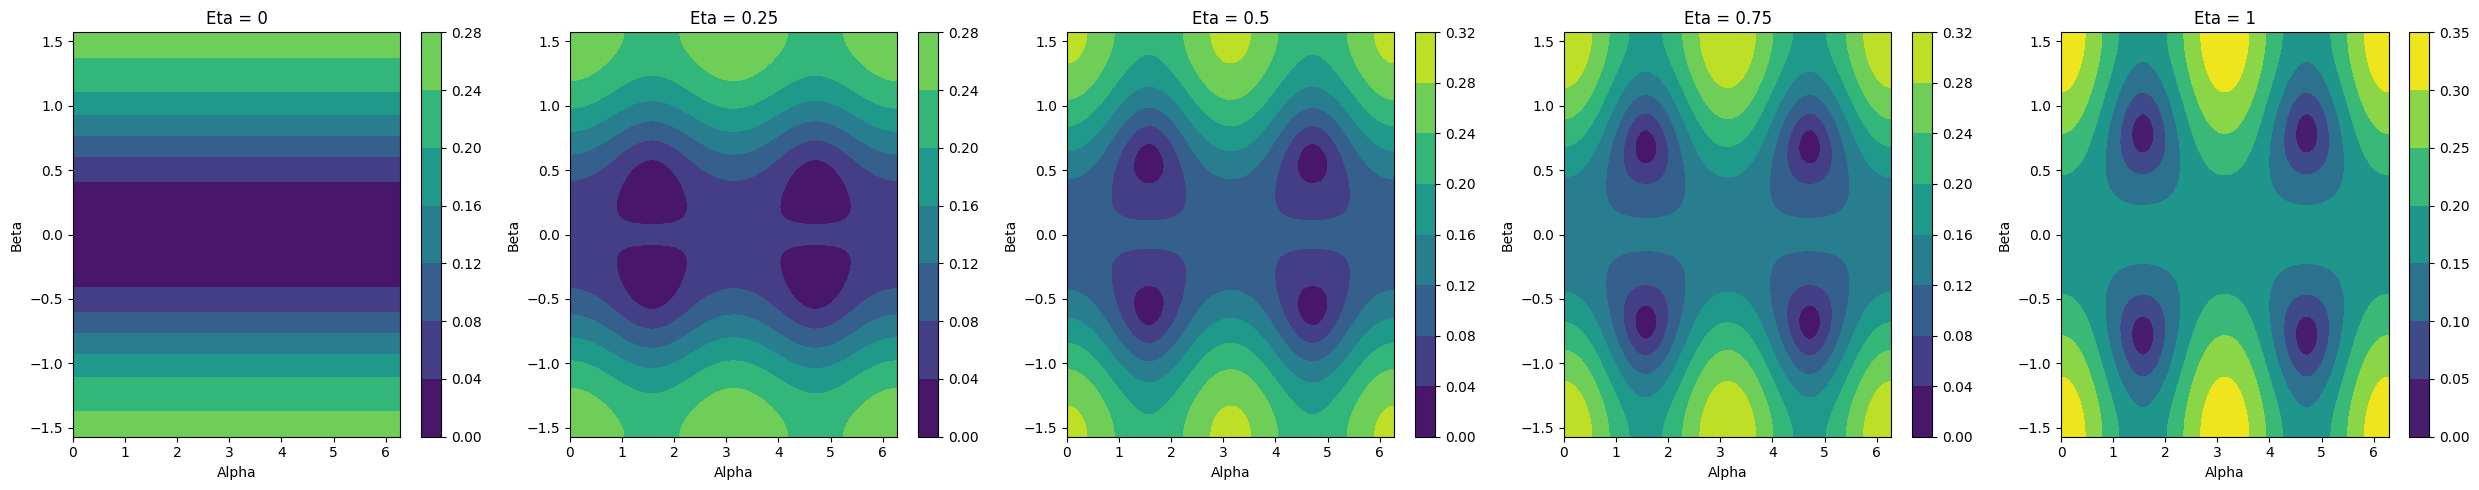

In [119]:
# Find global min and max of magnitudes
vmin_mag = np.min(all_magnitudes)
vmax_mag = np.max(all_magnitudes)

# Create a 2D contour plot for each eta
fig, axs = plt.subplots(1,len(eta_values), figsize=(5*len(eta_values),5))

for ax, eta, selected_magnitude in zip(axs, eta_values, all_magnitudes):
    contour = ax.contourf(alpha_grid, beta_grid, selected_magnitude, cmap=cm.viridis, vmin=vmin_mag, vmax=vmax_mag)

    # Add the colorbar
    fig.colorbar(contour, ax=ax)

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Beta')

plt.tight_layout()
plt.show()



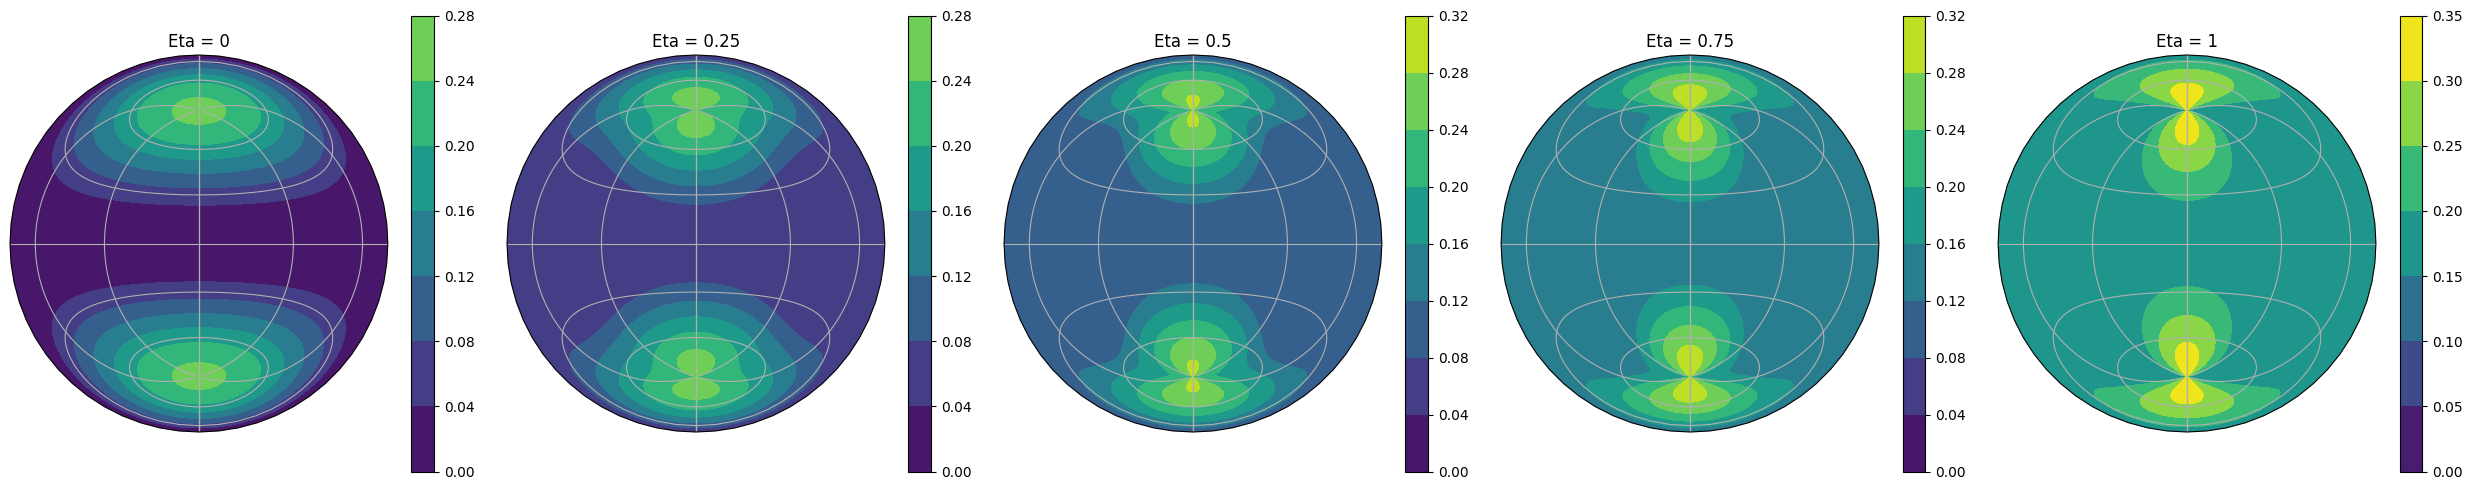

In [120]:
import cartopy.crs as ccrs

# Create a Lambert azimuthal equal area projection plot for each eta
# Rotate the plot by setting central_longitude and central_latitude
fig, axs = plt.subplots(1,len(eta_values), figsize=(5*len(eta_values),5), subplot_kw={'projection': ccrs.LambertAzimuthalEqualArea(central_longitude=0, central_latitude=0)})

for ax, eta, selected_magnitude in zip(axs, eta_values, all_magnitudes):
    ax.set_global()
    contour = ax.contourf(alpha_grid*180/np.pi, beta_grid*180/np.pi, selected_magnitude, transform=ccrs.PlateCarree(), cmap=cm.viridis, vmin=vmin_mag, vmax=vmax_mag)

    # Add the colorbar
    fig.colorbar(contour, ax=ax)

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha (degrees)')
    ax.set_ylabel('Beta (degrees)')

    # Add gridlines
    ax.gridlines()

plt.tight_layout()
plt.show()

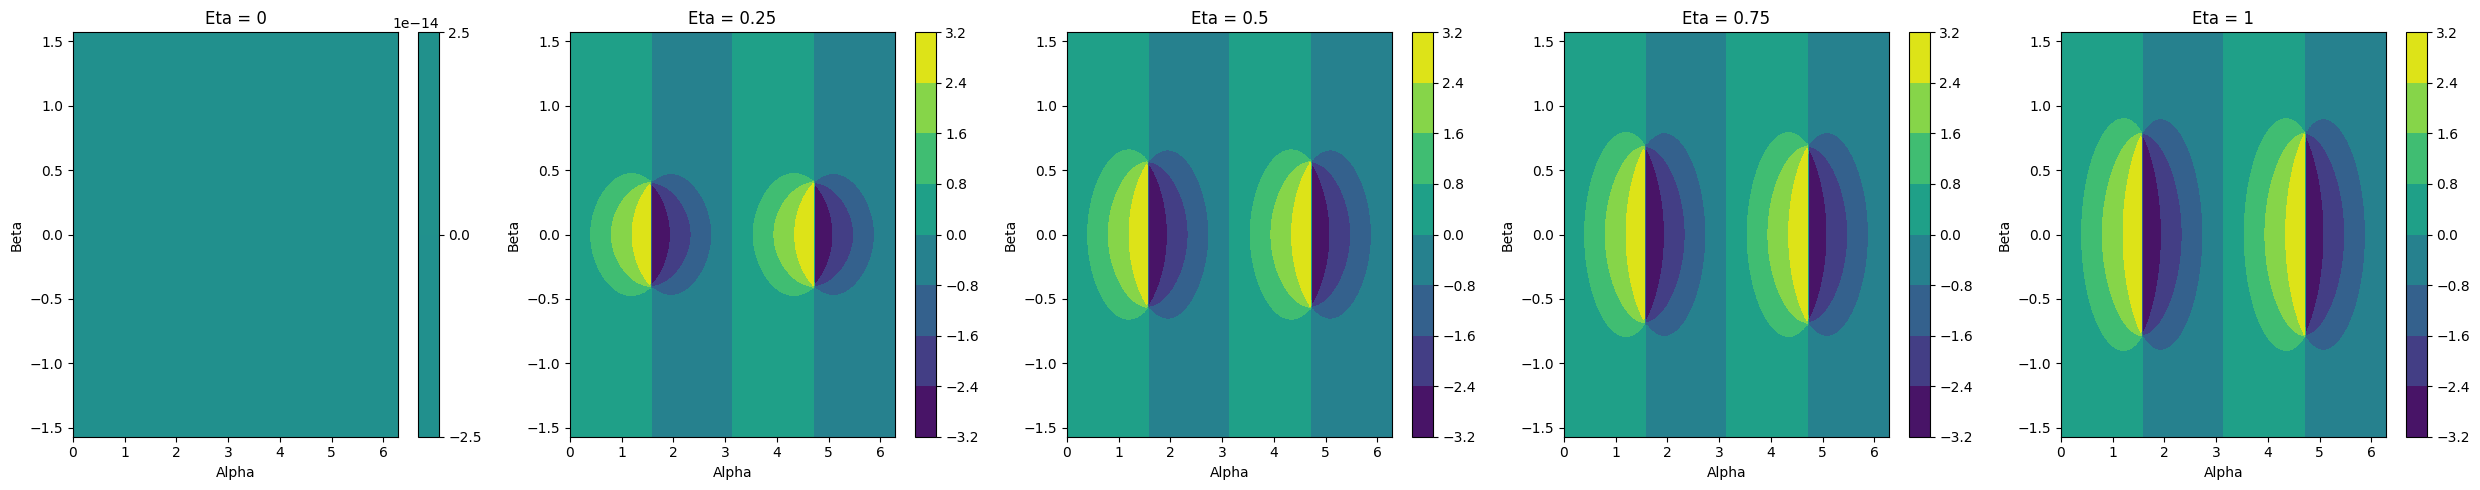

In [121]:
# Find global min and max of arguments
vmin_arg = np.min(all_arguments)
vmax_arg = np.max(all_arguments)

# Create a 2D contour plot for each eta
fig, axs = plt.subplots(1,len(eta_values), figsize=(5*len(eta_values),5))

for ax, eta, selected_argument in zip(axs, eta_values, all_arguments):
    contour = ax.contourf(alpha_grid, beta_grid, selected_argument, cmap=cm.viridis, vmin=vmin_arg, vmax=vmax_arg)

    # Add the colorbar
    fig.colorbar(contour, ax=ax)

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Beta')

plt.tight_layout()
plt.show()

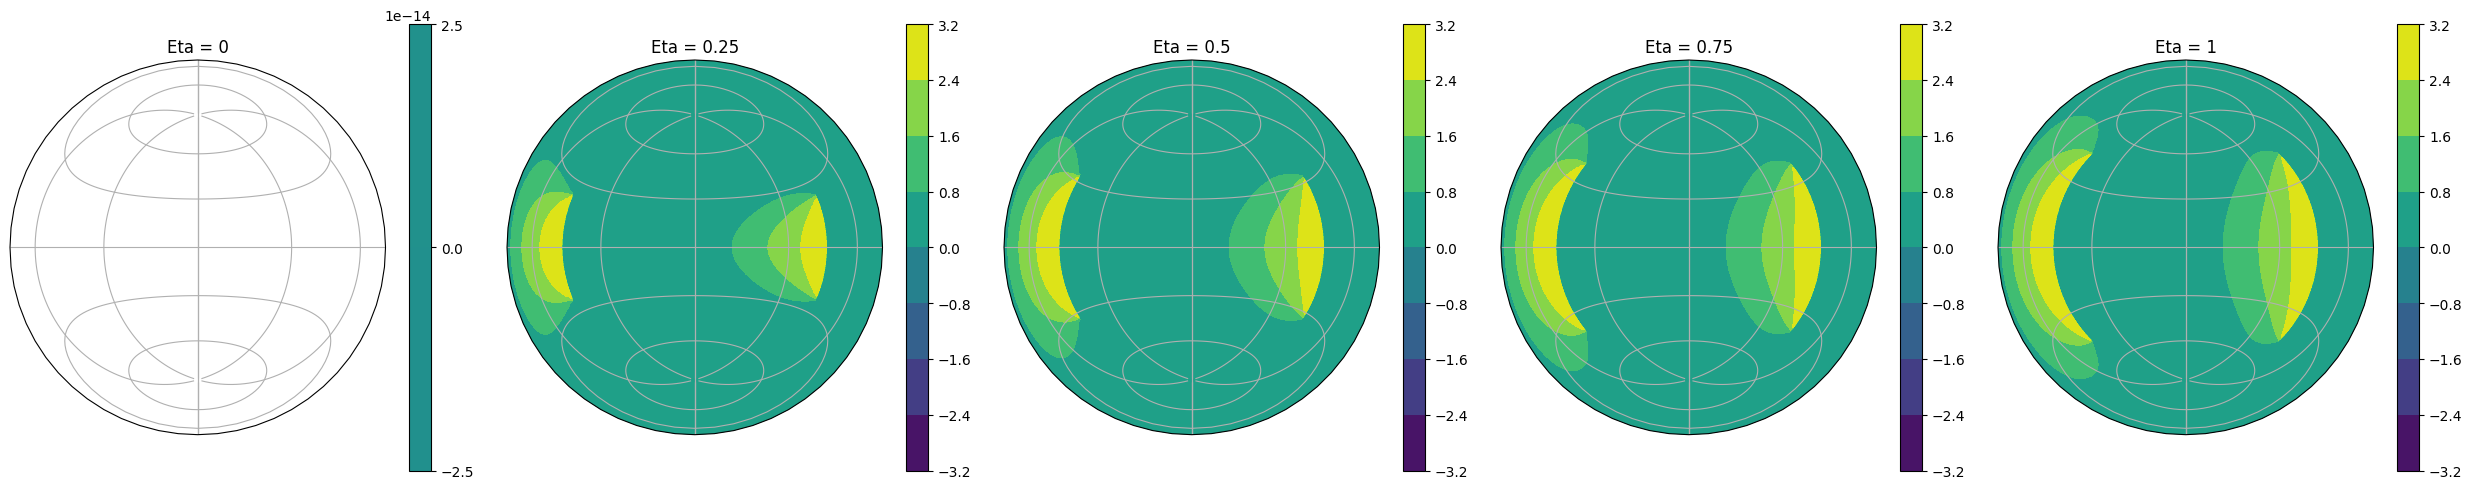

In [122]:
import cartopy.crs as ccrs

# Create a Lambert azimuthal equal area projection plot for each eta
# Rotate the plot by setting central_longitude and central_latitude
fig, axs = plt.subplots(1,len(eta_values), figsize=(5*len(eta_values),5), subplot_kw={'projection': ccrs.LambertAzimuthalEqualArea(central_longitude=0, central_latitude=0)})

for ax, eta, selected_argument in zip(axs, eta_values, all_arguments):
    ax.set_global()
    contour = ax.contourf(alpha_grid*180/np.pi, beta_grid*180/np.pi, selected_argument, transform=ccrs.PlateCarree(), cmap=cm.viridis, vmin=vmin_arg, vmax=vmax_arg)

    # Add the colorbar
    fig.colorbar(contour, ax=ax)

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha (degrees)')
    ax.set_ylabel('Beta (degrees)')

    # Add gridlines
    ax.gridlines()

plt.tight_layout()
plt.show()

In [123]:
rotorPhase = 120

# Initialize a list to store all frequencies
all_frequencies = []

# Loop over each eta value
for eta in eta_values:
    input = spinOps.createRho2(1, eta)

    # Initialize an empty array to store the magnitudes and arguments
    frequencies = np.zeros((beta_values.size, alpha_values.size, len(input)))

    # Loop over each alpha and beta value
    for i in range(alpha_values.size):
        for j in range(beta_values.size):
            # Call the Rotate function from PAS to Rotor Frame
            rotorFrame = spinOps.Rotate(input, alpha_values[i], beta_values[j], 0)
            # Call the Rotate function from Rotor Frame to Lab Frame
            output = spinOps.Rotate(rotorFrame, rotorPhase*np.pi/180, 0.9553166181245092, 0)
            # Compute the real part of the output array
            real = np.abs(np.real(output))
            # Store the magnitude in the array of magnitudes
            frequencies[j, i, :] = real

    # Select the magnitude for a specific element in the output array
    selected_frequency = frequencies[:, :, 2]

    # Store all frequencies
    all_frequencies.append(selected_frequency)

# Find global min and max of magnitudes
vmin = np.min(all_frequencies)
vmax = np.max(all_frequencies)


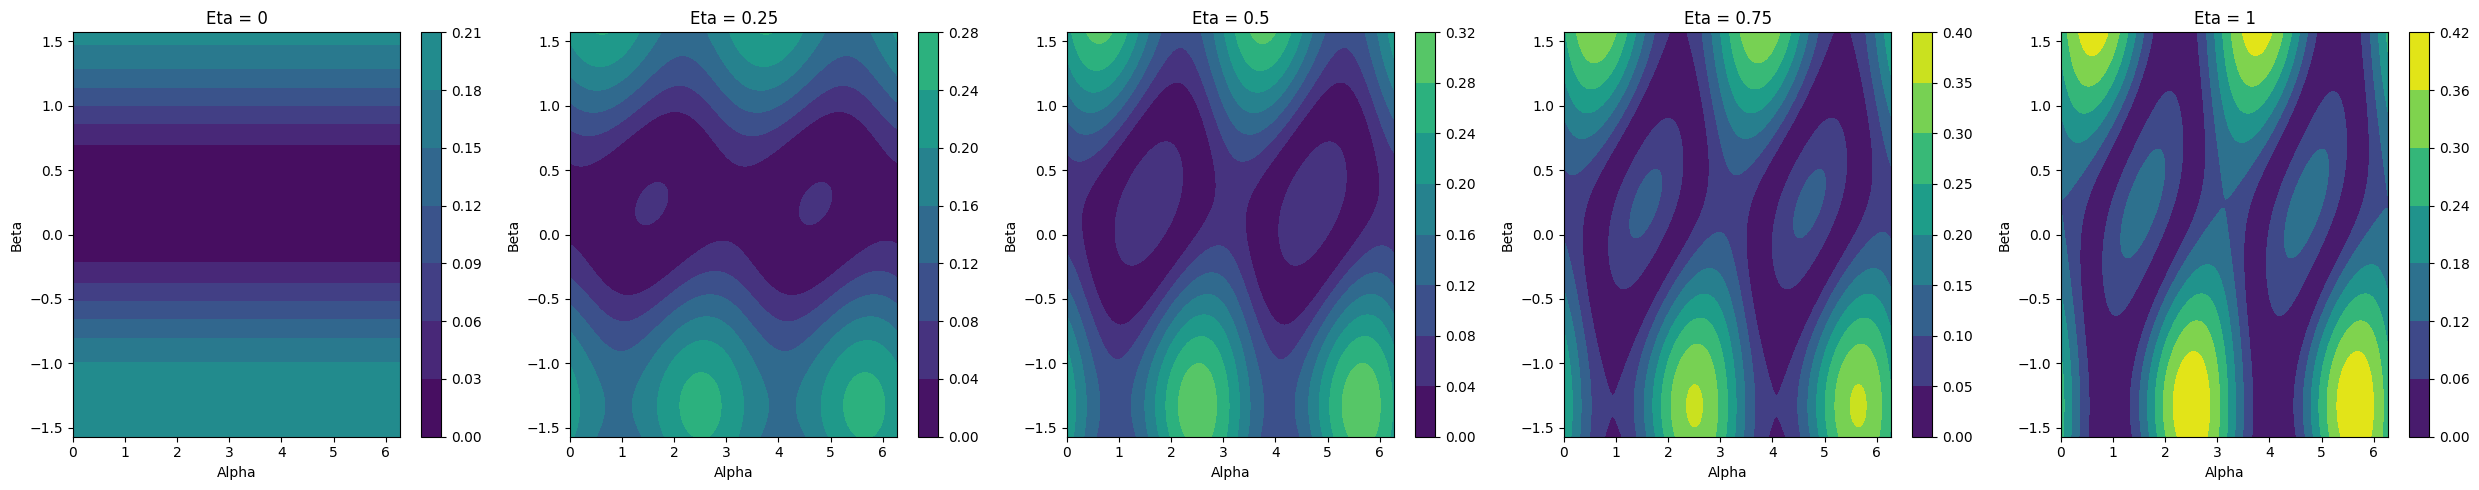

In [124]:
# Create a 2D contour plot for each eta
fig, axs = plt.subplots(1,len(eta_values), figsize=(5*len(eta_values),5))

for ax, eta, selected_frequency in zip(axs, eta_values, all_frequencies):
    contour = ax.contourf(alpha_grid, beta_grid, selected_frequency, cmap=cm.viridis, vmin=vmin, vmax=vmax)

    # Add the colorbar
    fig.colorbar(contour, ax=ax)

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha')
    ax.set_ylabel('Beta')

plt.tight_layout()
plt.show()



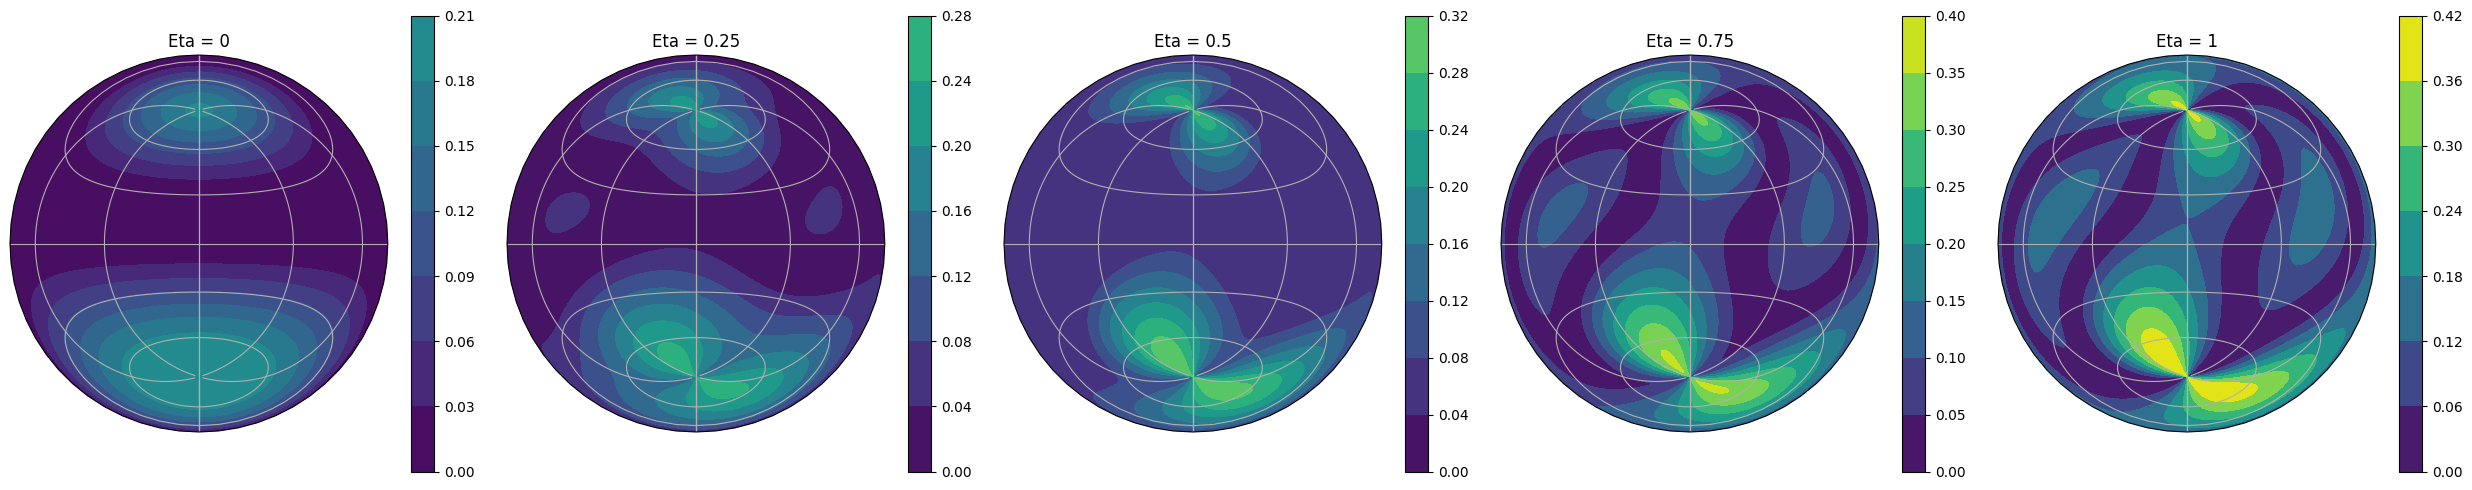

In [125]:
import cartopy.crs as ccrs

# Create a Lambert azimuthal equal area projection plot for each eta
# Rotate the plot by setting central_longitude and central_latitude
fig, axs = plt.subplots(1,len(eta_values), figsize=(5*len(eta_values),5), subplot_kw={'projection': ccrs.LambertAzimuthalEqualArea(central_longitude=0, central_latitude=0)})

for ax, eta, selected_frequency in zip(axs, eta_values, all_frequencies):
    ax.set_global()
    contour = ax.contourf(alpha_grid*180/np.pi, beta_grid*180/np.pi, selected_frequency, transform=ccrs.PlateCarree(), cmap=cm.viridis, vmin=vmin, vmax=vmax)

    # Add the colorbar
    fig.colorbar(contour, ax=ax)

    # Set the title of the plot to the current eta value
    ax.set_title(f'Eta = {eta}')

    # Add labels to the plot axes
    ax.set_xlabel('Alpha (degrees)')
    ax.set_ylabel('Beta (degrees)')

    # Add gridlines
    ax.gridlines()

plt.tight_layout()
plt.show()

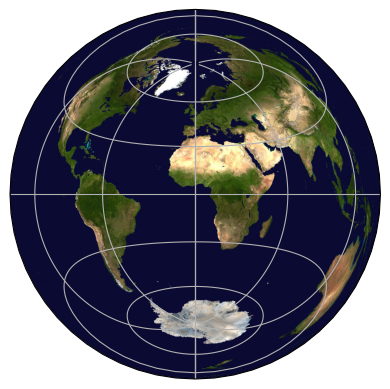

In [126]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cartopy.crs as ccrs

# Create a Lambert azimuthal equal area projection
projection = ccrs.LambertAzimuthalEqualArea(central_longitude=0, central_latitude=-0)

fig, ax = plt.subplots(subplot_kw={'projection': projection})

# Load the image
img = mpimg.imread('land_shallow_topo_2048.jpg')

# Display the image
ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

# Set global extent
ax.set_global()
# Add gridlines
ax.gridlines()

plt.show()